# NHL Shot and Goal Distribution of Players b/w 2019-2020

https://towardsdatascience.com/nhl-analytics-with-python-6390c5d3206d

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import requests
import pickle

In [5]:
game_data = []
season_type = '02'
year = '2019'          # taking limited data of 2019-2020 
max_game_ID = 1290     # maximum number of game events in an year

In [6]:
# pulling the data from API
for i in range(0, max_game_ID):
    r = requests.get(url='http://statsapi.web.nhl.com/api/v1/game/'
                     + year + season_type + str(i).zfill(4) + '/feed/live')
    data = r.json()
    game_data.append(data)

Run the following code to get a segment of game data

In [ ]:
#import json

# Pretty print json
#for i in range(0,2):
#    print (json.dumps(game_data[i], indent=1))

In [ ]:
# for dumping the dataset
with open('./'+ year + 'FullDatasetNHL.pkl', 'wb') as f:
    pickle.dump(game_data, f, pickle.HIGHEST_PROTOCOL)


Dumping the dataset on Kaggle as 2019FullDatasetNHL.pkl

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
color_map = plt.cm.winter
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

from matplotlib.patches import RegularPolygon
# for shape -- https://matplotlib.org/stable/api/patches_api.html

import math
from PIL import Image    # pillow to import image data

# Customer color mapping
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors

In [8]:
# Making 2 color maps for positive and negative shots
c = mcolors.ColorConverter().to_rgb
positive_cm = ListedColormap([c('#e1e5e5'), c('#d63b36')]) # Red - more attack
negative_cm = ListedColormap([c('#e1e5e5'), c('#28aee4')]) # Blue

## Calculating the Average Shooting Percentage at each point on the Ice

Making Dictionary for holding cordinates for Shots and Goals

In [9]:
league_data = {}

league_data['Shot'] = {}
league_data['Shot']['x'] = []
league_data['Shot']['y'] = []

league_data['Goal'] = {}
league_data['Goal']['x'] = []
league_data['Goal']['y'] = []

In [10]:
league_data

{'Shot': {'x': [], 'y': []}, 'Goal': {'x': [], 'y': []}}

In [11]:
# Currently interested in only these 2 types of events - Shots and Goals to determine the success rate
event_types = ['Shot', 'Goal']

In [12]:
for i in game_data:
    # if the liveData key is not present in the ith element of game data then skip it to prevent any errors
    if 'liveData' not in i:
        continue
    
    plays = i['liveData']['plays']['allPlays']
    
    # for each play
    for play in plays:
        for event in event_types:
            if play['result']['event'] in event:
                # save the x and y coordinates of goal/shot
                if 'x' in play['coordinates']:
                    league_data[event]['x'].append(play['coordinates']['x'])
                    league_data[event]['y'].append(play['coordinates']['y'])        

In [13]:
print("Some of the Shots are:")
for i in range(0,5):
    print(league_data['Shot']['x'][i],", ", league_data['Shot']['y'][i])
    
print("\nSome of the Goal points are:")
for i in range(0,5):
    print(league_data['Goal']['x'][i],", ",league_data['Goal']['y'][i])

Some of the Shots are:
-32.0 ,  -2.0
63.0 ,  -6.0
-59.0 ,  -20.0
-42.0 ,  -29.0
-52.0 ,  -7.0

Some of the Goal points are:
85.0 ,  -1.0
86.0 ,  0.0
84.0 ,  2.0
-83.0 ,  -6.0
83.0 ,  5.0


## Extracting Player Data

In [14]:
import json

player_names = [] # getting all player names who are shooters or scorers
for i in game_data:
    if 'liveData' not in i:
        continue
    
    plays = i["liveData"]['plays']['allPlays']
    players_name = []
    for play in plays:
        if 'players' in play:
            for player in play['players']:
                if player['playerType'] in ['Shooter', 'Scorer']:
                    player_names.append(player['player']['fullName'])

In [15]:
# Since the player names have some repetitions, we get a clean non-duplicate list of player names
player_names_unique = []
[player_names_unique.append(x) for x in player_names if x not in player_names_unique]

print(len(player_names))
print(len(player_names_unique))

123378
886


So we have 886 unique players playing in the NHL from 2019 to 2020 who are either Shooters/Scorers

In [16]:
print("Some of the NHL players of 2019-2020 are: \n")
for i in range(0,10):
    print(player_names_unique[i])

Some of the NHL players of 2019-2020 are: 

Brady Tkachuk
Nikita Zaitsev
Morgan Rielly
Andreas Johnsson
Mitchell Marner
Dmytro Timashov
Dylan DeMelo
Trevor Moore
Tyson Barrie
Cody Ceci


In [17]:
player_data = {}
for player in player_names_unique:
    player_data[player] = {}
    
    player_data[player]['Shot'] = {}
    player_data[player]['Shot']['x'] = []
    player_data[player]['Shot']['y'] = []

    player_data[player]['Goal'] = {}
    player_data[player]['Goal']['x'] = []
    player_data[player]['Goal']['y'] = []

#player_data

Player data empty template looks something like: 'John Tavares': {'Shot': {'x': [], 'y': []}, 'Goal': {'x': [], 'y': []}}

### Adding Goals and Shots for every player

In [83]:
event_types

['Shot', 'Goal']

In [18]:
for i in game_data:
    if 'liveData' not in i:
        continue
    
    plays = i['liveData']['plays']['allPlays']
    
    for play in plays:
        if 'players' in play:
            for player in play['players']:
                if player['player']['fullName'] in player_names_unique:
                    for event in event_types:
                        if play['result']['event'] in event:
                            # save the x and y coordinates of goal/shot
                            if 'x' in play['coordinates']:
                                player_data[player['player']['fullName']][event]['x'].append(play['coordinates']['x'])
                                player_data[player['player']['fullName']][event]['y'].append(play['coordinates']['y']) 


In [95]:
#player_data

### Analyzing the shots and goals of Specific player

In [19]:
player = 'Alex Ovechkin'

print("Shots of {}:".format(player))
for i in range(0,10):
    print(player_data[player]['Shot']['x'][i], ', ', player_data[player]['Shot']['y'][i])

print("\nGoals of {}:".format(player))    
for i in range(0,10):
    print(player_data[player]['Goal']['x'][i], ', ', player_data[player]['Goal']['y'][i])

Shots of Alex Ovechkin:
91.0 ,  -27.0
-78.0 ,  3.0
-52.0 ,  25.0
-68.0 ,  34.0
-57.0 ,  -11.0
-56.0 ,  -14.0
-50.0 ,  -20.0
58.0 ,  16.0
48.0 ,  21.0
58.0 ,  20.0

Goals of Alex Ovechkin:
-57.0 ,  18.0
54.0 ,  -40.0
53.0 ,  22.0
60.0 ,  20.0
-4.0 ,  34.0
82.0 ,  4.0
-34.0 ,  7.0
54.0 ,  21.0
-82.0 ,  -8.0
61.0 ,  10.0


## Calculating the Player Stats

In [29]:
def calculate_stats(player):
    player_total_shots = len(player_data[player]['Shot']['x']) + len(player_data[player]['Goal']['x']) 
    player_total_goals = len(player_data[player]['Goal']['x'])
    success_percent = player_total_goals/player_total_shots*100
    
    print("Player {} 2019-2020 summary: ".format(player))
    print("Number of Shots taken are: ", player_total_shots)
    print("Number of Goals scored are: ", player_total_goals)
    print("Success rate: {:.2f} %".format(success_percent))
    
    return success_percent

league_total_shots = len(league_data['Shot']['x']) + len(league_data['Goal']['x'])
league_total_goals = len(league_data['Goal']['x'])
league_success_avg_percent = league_total_goals/league_total_shots*100
print("NHL League 2019-2020 average: {:.2f} % \n".format(league_success_avg_percent))

# calculate spread of shots on goals % of player
player = 'Alex Ovechkin'
player_SOG_spread = calculate_stats(player) - league_success_avg_percent
print("\nPlayer {} Shots on Goals spread for the league: {:.2f} %".format(player, player_SOG_spread))

NHL League 2019-2020 average: 9.71 % 

Player Alex Ovechkin 2019-2020 summary: 
Number of Shots taken are:  334
Number of Goals scored are:  68
Success rate: 20.36 %

Player Alex Ovechkin Shots on Goals spread for the league: 10.65 %


#### Positive spread means having success rate greater than league average -> sign of a good player

## Shot Location Analysis and Plotting

In [57]:
## Defining the dimensions of the ice-hockey arena
xbnds = np.array([-100,100])
ybnds = np.array([-100,100])

extent = [xbnds[0], xbnds[1], ybnds[0], ybnds[1]]
gridsize = 30
mincnt = 1

#### Reversing the negative coordinates because the attacking side changes within the game, so to normalize the goals and shots on one side
#### Basically flipping the negative locations to always represnt the attacking side - since the scorer never scores on their own net
#### Every period the player switches side, but the ice-hockey cordinate system is fixed

In [37]:
# for Shots
# concatenating all shots and goals for league data 
league_x_all_shots = league_data['Shot']['x'] + league_data['Goal']['x']
league_y_all_shots = league_data['Shot']['y'] + league_data['Goal']['y']

# Perform the cordinate flipping
league_x_all_shots_normalized = []
league_y_all_shots_normalized = []

for i,shots in enumerate(league_x_all_shots):
    if league_x_all_shots[i]<0:
        league_x_all_shots_normalized.append(-league_x_all_shots[i])
        league_y_all_shots_normalized.append(-league_y_all_shots[i])
    else:
        league_x_all_shots_normalized.append(league_x_all_shots[i])
        league_y_all_shots_normalized.append(league_y_all_shots[i])
        

        
# same for Goals
league_x_all_goals = league_data['Goal']['x']
league_y_all_goals = league_data['Goal']['y']

league_x_all_goals_normalized = []
league_y_all_goals_normalized = []

for i,goals in enumerate(league_x_all_goals):
    if league_x_all_goals[i]<0:
        league_x_all_goals_normalized.append(-league_x_all_goals[i])
        league_y_all_goals_normalized.append(-league_y_all_goals[i])
    else:
        league_x_all_goals_normalized.append(league_x_all_goals[i])
        league_y_all_goals_normalized.append(league_y_all_goals[i])

#### Bucketing data into histogram since we cannot plot every single shot/goal

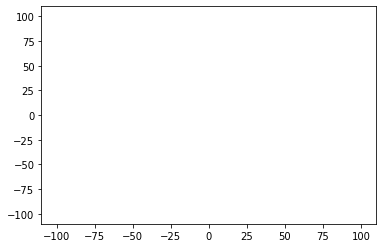

In [42]:
league_hex_data = plt.hexbin(league_x_all_shots_normalized, league_y_all_shots_normalized, gridsize=gridsize, mincnt=mincnt, extent=extent, alpha=0.0)
league_verts = league_hex_data.get_offsets()  ## these are the bin positions I think
league_shot_frequency = league_hex_data.get_array()

In [39]:
league_verts

array([[-100.0000002 , -100.        ],
       [-100.0000002 ,  -88.23529412],
       [-100.0000002 ,  -76.47058824],
       ...,
       [  96.66666686,   70.58823529],
       [  96.66666686,   82.35294118],
       [  96.66666686,   94.11764706]])

In [43]:
league_shot_frequency

array([0., 0., 0., ..., 0., 0., 0.])

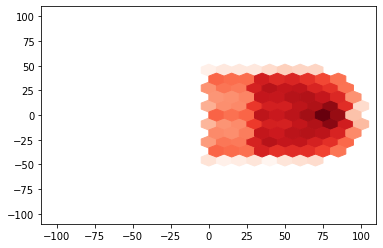

In [95]:
# First we will used the hexbin function to simply bucket our shot data into basically a 2D histogram
league_hex_data = plt.hexbin(league_x_all_shots_normalized,
   league_y_all_shots_normalized, gridsize=20, mincnt=4, extent=extent, cmap = 'Reds', bins="log")
# Now we extract the bin coordinates and counts
league_verts = league_hex_data.get_offsets()
league_shot_frequency = league_hex_data.get_array()

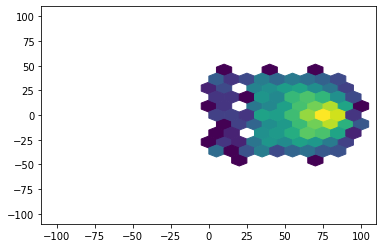

In [96]:
# Do the same thing for the goal data
league_goal_hex_data =  plt.hexbin(league_x_all_goals_normalized,
   league_y_all_goals_normalized,gridsize=20, mincnt=1, extent=extent, bins="log")
# Since the grid is the same we can use a shared bin coordinate set from the above. So here we just get the counts
league_goal_frequency = league_goal_hex_data.get_array()

In [93]:
league_goal_frequency

array([  2.,   2.,   1.,   1.,   1.,   1.,   2.,   1.,   1.,   1.,   3.,
         1.,   1.,   1.,   2.,   1.,   3.,   1.,   1.,   1.,   1.,   1.,
        13.,  10.,  18.,  22.,  13.,  18.,   1.,   2.,  18.,  12.,  19.,
        16.,  15.,  10.,   1.,   2.,   7.,  19.,  18.,  22.,  15.,  16.,
         1.,   1.,  15.,  33.,  25.,  39.,  39.,  16.,   2.,   1.,  13.,
        48.,  65.,  68.,  67.,  18.,   2.,   3.,   7., 112., 101., 114.,
        70.,  15.,   3.,   1.,  11.,  77., 184., 210.,  54.,   5.,   2.,
         3.,  50., 481., 481.,  28.,   5.,   3.,  17., 232., 165.,  12.,
         2.,   1.,  11.,   4.,   3.,   2.,   1.,   1.,   9.,   1.,   1.,
         2.,   3.,   1.,   2.,   1.,   5.,   1.,   3.,   4.,   4.,   2.,
         2.,   2.,   1.,   1.,  10.,   6.,   1.,  13.,   3.,  11.,  10.,
         7.,  28.,  11.,  25.,  16.,  23.,  10.,   1.,  16.,  14.,  20.,
         7.,  12.,   5.,   3.,  22.,  24.,  28.,  17.,  34.,   5.,   5.,
        39.,  41.,  70.,  57.,  50.,  10.,   8.,  5

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


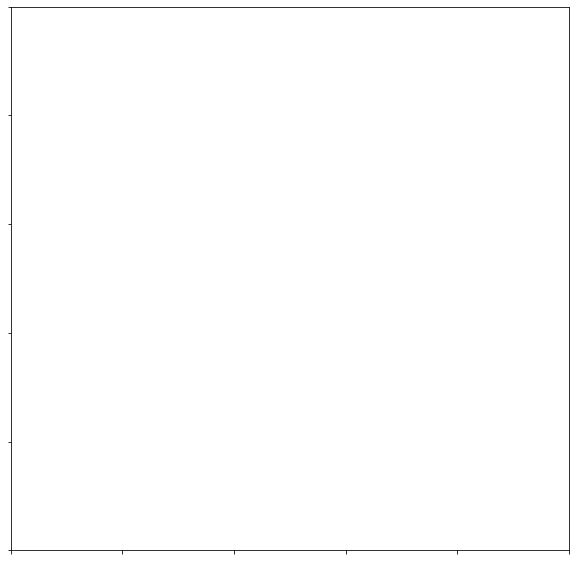

In [99]:
# Using matplotlib we create a new figure for plotting
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# Clean up the figure to be completely blank
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)
# Remove the labelling of axes
ax.set_xticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
# Using pillow to get the rink image and extract the image size
I = Image.open('../input/nhl-images/half.png')
#ax.imshow(I);width, height = I.size

In [100]:
# Calculate the scaling factor and offset (trial and error)
scalingx=width/100-0.6;
scalingy=height/100+0.5;
x_trans=33;
y_trans=height/2
# We will want to scale the size of our hex bins with the image so we calculate a "radius" scaling factor here
S = 3.8*scalingx;

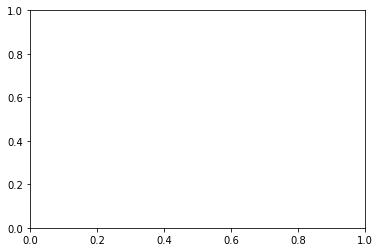

In [102]:
# Loop over the locations and draw the hex
for i,v in enumerate(league_verts):
   # Normalize the shot frequency data between 0-1 
    scaled_league_shot_frequency= league_shot_frequency[i]/max(league_shot_frequency)
   # Scale the hexagon size based on shot frequency
    radius = S*math.sqrt(scaled_league_shot_frequency)
   # Finally we will plot the hexagon including the scaling and
   # translations we found earlier
    hex = RegularPolygon((x_trans+v[0]*scalingx, 
      y_trans-v[1]*scalingy),numVertices=6, radius=radius,
      orientation=np.radians(0), facecolor='#f6cd60', edgecolor=None)
    ax.add_patch(hex)

ax.set_xlim([0,100])
ax.set_ylim([-50,50])

plt.grid(False)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


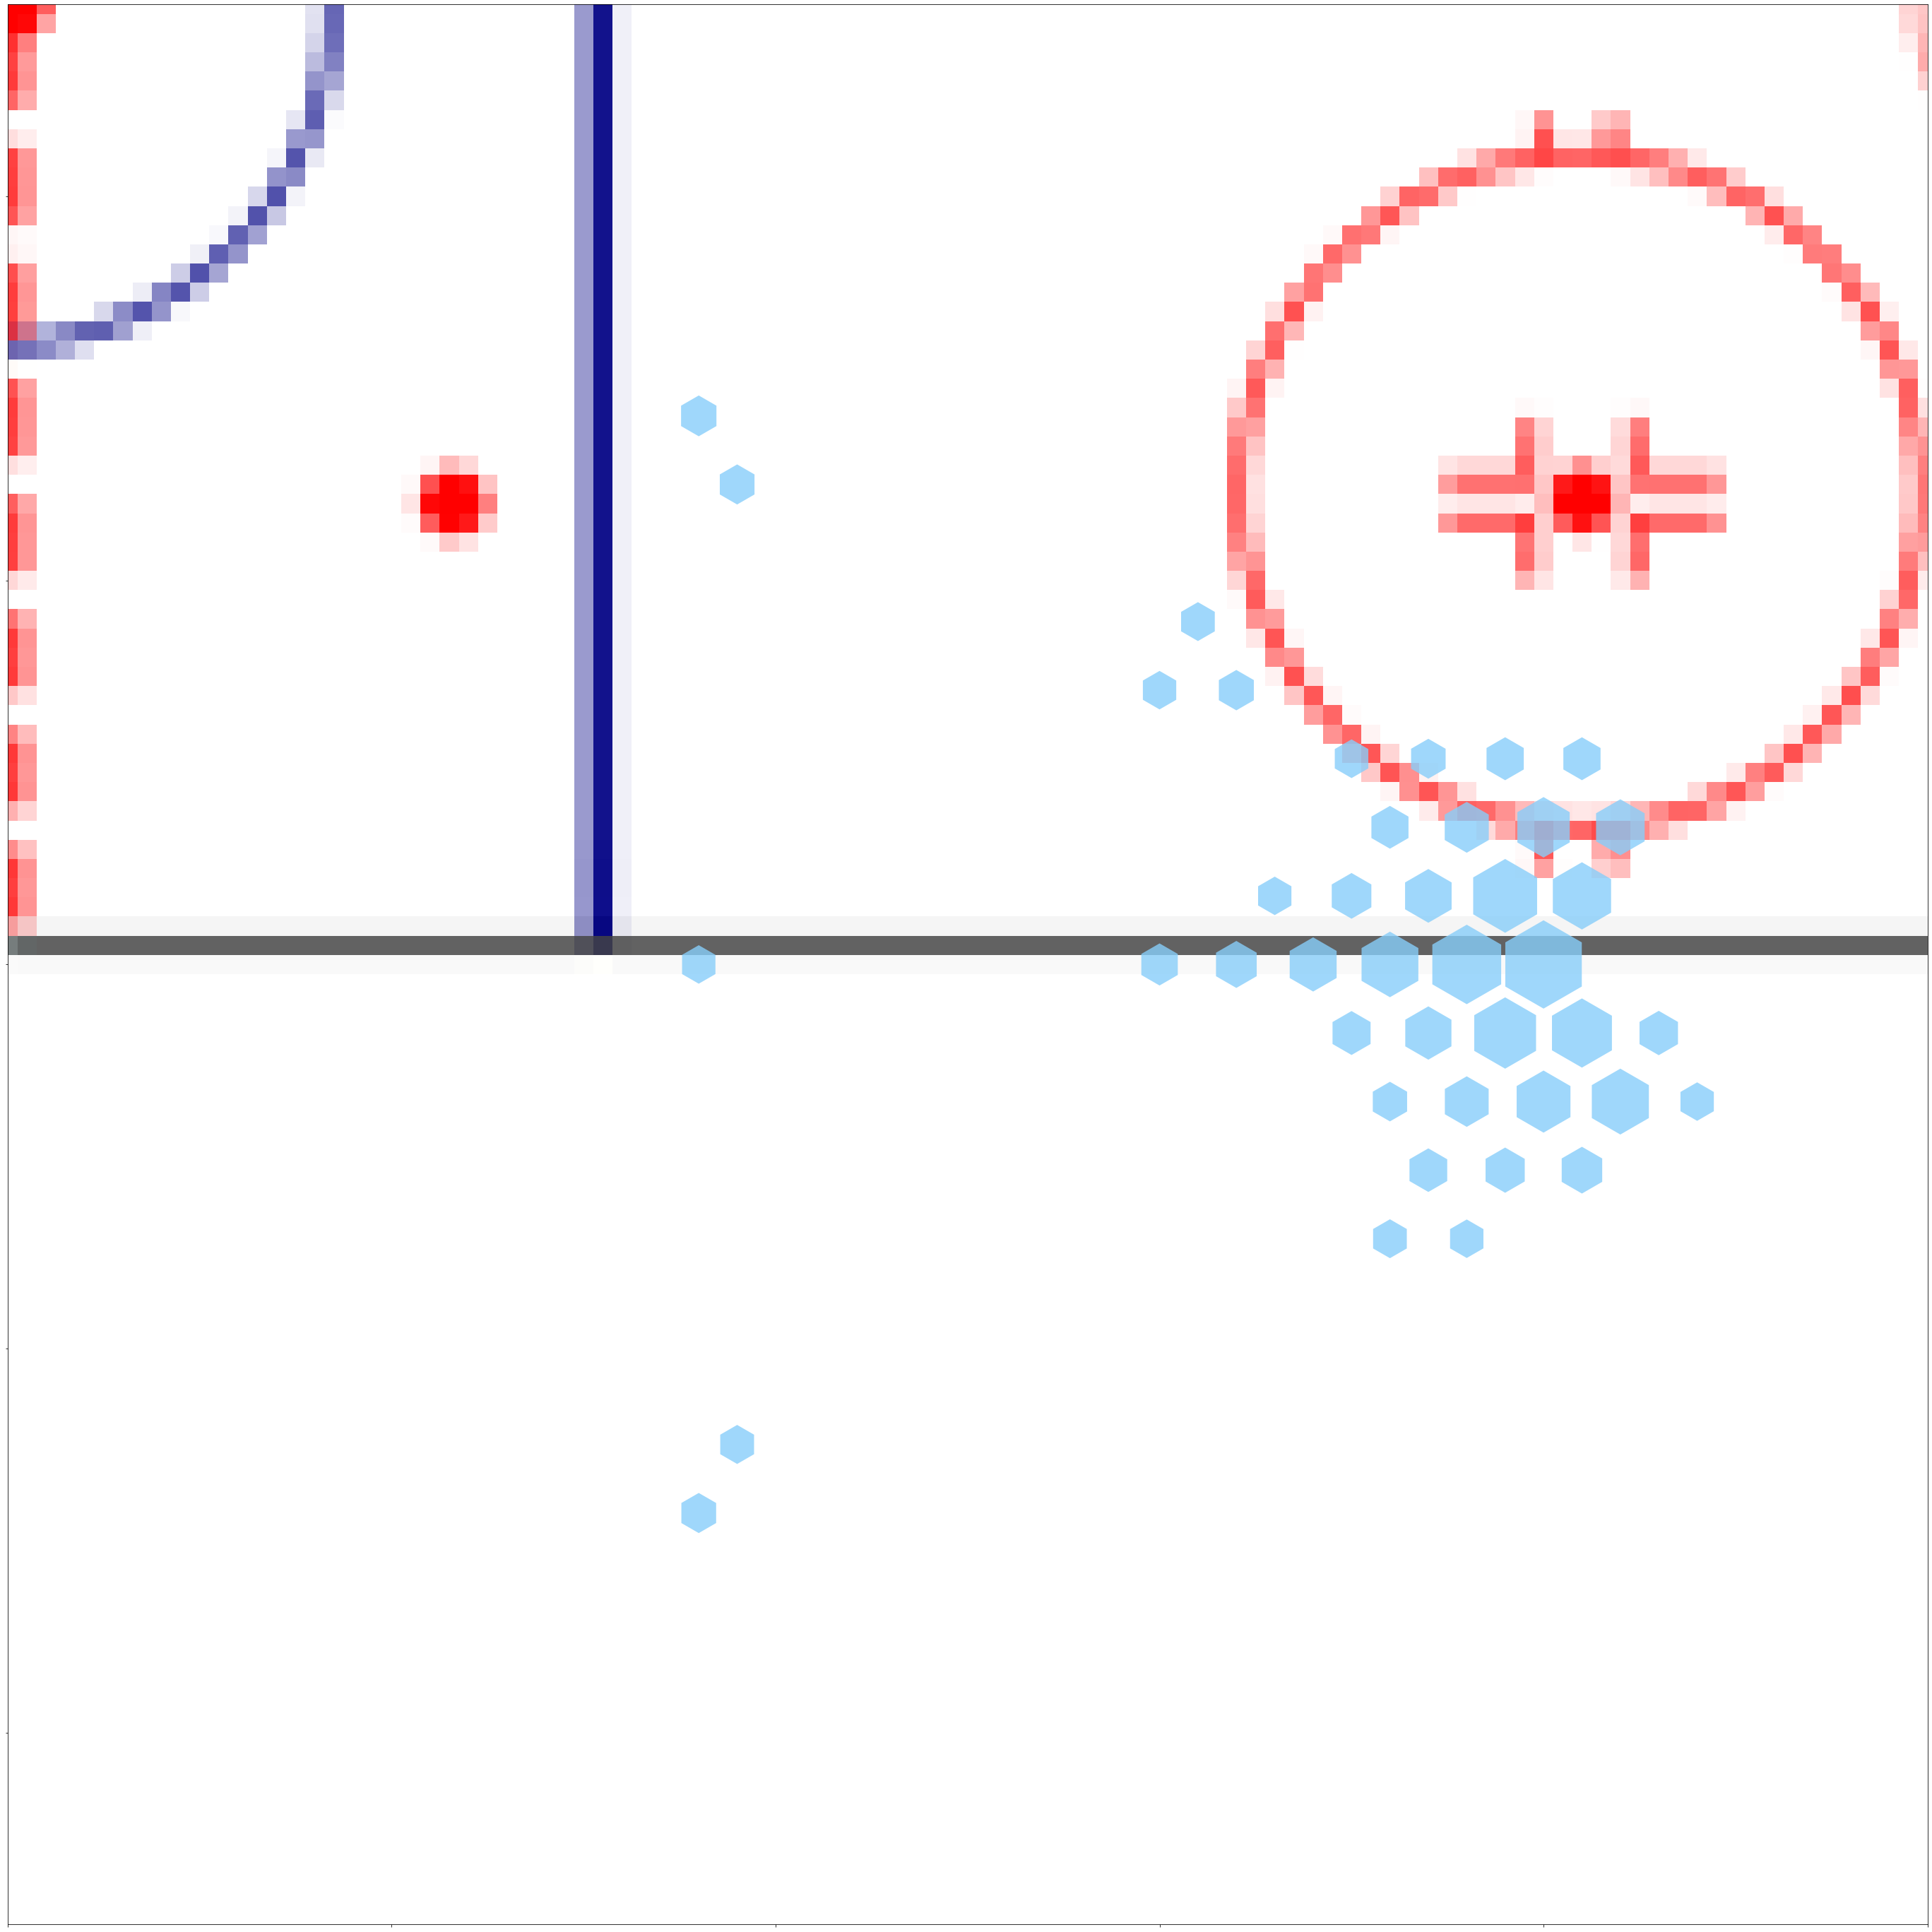

In [117]:
# Shot Type Analysis
xbnds = np.array([-100.,100.0])
ybnds = np.array([-100,100])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
fig=plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)
ax.set_xticklabels(labels = [''], fontsize = 18,alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,alpha = .7,minor=False)
basewidth = 100

# I = Image.open('../input/nhl-images/Half.png')
# wpercent = (basewidth/float(I.size[0]))
# hsize = int((float(I.size[1])*float(wpercent)))
# I = I.resize((basewidth,hsize), Image.ANTIALIAS)
# Using pillow to get the rink image and extract the image size
I = Image.open('../input/nhl-images/half.png')
ax.imshow(I.resize((120, 100)))
width, height = I.size
#print("size of image: ", )

scalingx=1
scalingy=1
x_trans=0
y_trans=0


S = 2.3
# Wrist Shot
#x_shot_wrist2 = [abs(y) for y in x_shot_wrist];y_shot_wrist2 = [-y for y in y_shot_wrist]
#image = plt.hexbin(x_shot_wrist2,y_shot_wrist2,cmap='Reds',gridsize=50,extent=extent,mincnt=1,bins='log',alpha=0.0,edgecolors ='white',linewidths=1)
league_hex_data = plt.hexbin(league_x_all_shots_normalized, league_y_all_shots_normalized, gridsize=50, mincnt=1, extent=extent, alpha=0.0)
league_verts = league_hex_data.get_offsets()  ## these are the bin positions I think
league_shot_frequency = league_hex_data.get_array()

for i,v in enumerate(league_verts):
    total_freq = league_shot_frequency[i]/max(league_shot_frequency)
    radius = S*math.sqrt(total_freq)
    if radius < 1.: radius =0
    radius = radius
    hex = RegularPolygon((x_trans+v[0]*scalingx, y_trans+ v[1]*scalingy), numVertices=6, radius=radius, orientation=np.radians(0),facecolor='#87cefa', alpha=0.8, edgecolor=None)
    ax.add_patch(hex)
    
ax.set_xlim([0,100])
ax.set_ylim([-50,50])

plt.grid(False)

plt.show()